# 1.Nagler's Example

Population size: 3000
Infected at t=0: 7
R0= 2.6
R_eff=1 at t= 28 d


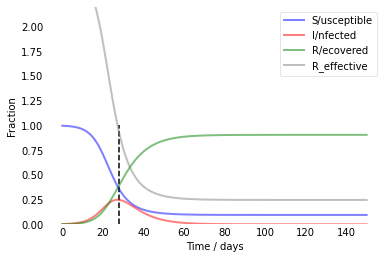

In [29]:
# Basic SIR model (adapted) Jan Nagler (speak Sir Jan Nagler), v2
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Population size
N = 3000

# Initial conditions: 7 Infected, no Recovered individuals
I0, R0 = 7, 0 #case zero

# All others, S=N-I-R susceptible, initially S0=N-I0-R0
S0 = N - I0 - R0 #normalization

# Contact rate, beta, how agressive virus is; 
# Recovery rate, gamma, here assumes no death!!! 0.15 meaning revover ove 1 week: 1/7 = 0.15... depends on the interpretation using days/ hours/ seconds... always 1 over duration we defined
beta, gamma = 0.39, 0.15

# Basic reproduction number R0 (speak R nought), average number of individuals that get infected over the period where an infected person is infectious at time 0 where no one is infected 
# gamma gives the time scale used to calculate recovery rate 
# R0 is direct proportional to beta
R_nought = beta / gamma #logic not explained 

# by pure logic, or following the literature
# https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1a-epidemiology/epidemic-theory
# R_effective = R_nought * S/N, as used in the plot

print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",R_nought)

# A grid of time points (in days)
t = np.linspace(0, 150, 150)

# SIR model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N #for all N that are not =1
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

#1/gamma average time to recover

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid t.
# args takes all parameters
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # return 3 vectors

#find R_effective = 1 time
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time]/N < 1: 
        t_1 = time
        break
print("R_eff=1 at t=", t_1, "d")


# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
ax.set_xlabel('Time / days')
ax.set_ylabel('Fraction')
ax.set_ylim(0,2.2)
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# 2.Question-1 (a)

The SIR model is a 3-compartment model.  Extend this model to 4 com-partments,  where  the  4th  compartment  is  for  deaths  (D).  Mortality  ismodelled by new transitions fromI→Ddefined by the mortality rateμ.Susceptible and Recovered do not die.(a) Derive the corresponding system of equations for S, I, R and D. E.g.,dDdt=μIbut this is not the only difference to SIR. In addition, the basicreproduction number may now depend onμas well, how?

(a) Derive the corresponding system of equations for S, I, R and D. E.g.,dDdt=μIbut this is not the only difference to SIR. In addition, the basicreproduction number may now depend onμas well, how?

Population size: 3000
Infected at t=0: 10
R0= 1.6666666666666665
R_eff=1 at t= 25 d


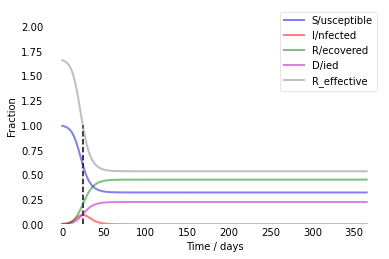

In [3]:
N = 3000 # Population size
I0, R0, D0 = 10, 0, 0 #Initial conditions t=0
S0 = N - I0 - R0 - D0 #Normalization

β = 0.5 # = 1 /2 days 
Ɣ = 0.2 # = 1 /5 days
μ = 0.1 # = 1 /10 days
# Using "1 day" as time unit, on average β people are infected per day or 1 person is infected every 1/β days; at the same time, on average Ɣ people recover per day or 1 person recovers every 1/Ɣ days; at the same time, on average μ people die per day or 1 person dies every 1/μ days

R_nought = β / (Ɣ + μ) 
# R_nought is previously measured as β/Ɣ, the number of infected people over the number of recovered people, which gives a base-line infectiousness of COVID as its the fundamental property. At time 0, R_nought is directly proportional to β and inversely preportional to Ɣ. R_nought is dependent on β and Ɣ. 

# By introducing the parameter μ, the death rate, we add one more scenario after infection. Therefore, among β infected people, Ɣ people will recover and μ people will die in a time unit. All three parameters are fundamental properties of COVID. To reflect this added scenario, we need to add μ to Ɣ. Now at time 0, R_nought is still directly proportional to β,but inversely preportional to the sum of Ɣ and μ. Therefore, R_nought now is dependent on β, Ɣ and μ. 

# Set time range: 365 days;  Time scale/step: 1 day
t = np.linspace(0, 365, 365)# A grid of time points (in days)

######## SIRD model 
def deriv_sird(y, t, N, β, Ɣ, μ):
    S, I, R, D = y
    dSdt = -β * S * I / N 
    dIdt = β * S * I / N - Ɣ * I - μ * I
    dRdt = Ɣ * I
    dDdt = μ * I
    return dSdt, dIdt, dRdt, dDdt

# Initial conditions vector
y0 = S0, I0, R0, D0

# Integrate the SIRD equations over the time grid t. args takes all parameters
ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))
S, I, R, D = ret.T # return 4 vectors

#find the time when R_effective = 1, R_effective = R_nought * S/N, as used in the plot
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time]/N < 1:  
        t_1 = time
        break

#Print Info.:
print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",R_nought)
print("R_eff=1 at t=", t_1, "d")

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, D/N, 'm', alpha=0.5, lw=2, label='D/ied')
ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
ax.set_xlabel('Time / days')
ax.set_ylabel('Fraction')
ax.set_ylim(0,2.2)
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()



# 2.Question-1 (b)

(b) Assume that the basic reproduction number R0 for COVID-B117 is not ex-actly known but only the range R_nought ∈ \[3.0,4.0]\.  Assume that the mortalityrateμis also not exactly known but only the range μ ∈ \[0.4%,4%]\.  Studyhow these parameter uncertainties affect the prediction of D at t=365d. What about the cumulative number of deaths after a year?

Population size: 3000
Infected at t=0: 10
R0= 3
Cummulative Death Number: 713.6823392723028


Text(0, 0.5, 'Cummulative Death Number at Year End')

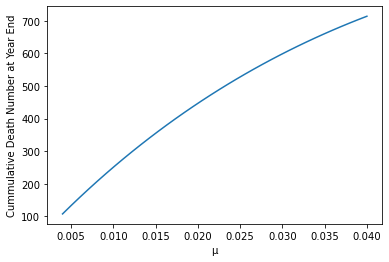

In [4]:
N = 3000 # Population size
I0, R0, D0 = 10, 0, 0 #Initial conditions at t=0
S0 = N - I0 - R0 - D0 #Normalization

# Initial conditions vector at t=0
y0 = S0, I0, R0, D0

# A grid of time points (range: 365 days; scale/step: 1 day)
t = np.linspace(0, 365, 365) 

R_nought = 3 # Hold R_nought constant
β, Ɣ = 0.3, 0.1

mu = np.linspace(0.004, 0.04, 36).tolist()
Cum_D = []
for μ in mu:
    # SIRD model
    def deriv_sird(y, t, N, β, Ɣ, μ): 
        S, I, R, D = y
        dSdt = -β * S * I / N 
        dIdt = β * S * I / N - Ɣ * I - μ * I
        dRdt = Ɣ * I
        dDdt = μ * I
        return dSdt, dIdt, dRdt, dDdt
    
    # Integrate the SIRD equations over the time grid t
    ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))
    S, I, R, D = ret.T # return 4 vectors
    Cum_D.append(D[-1])


print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",R_nought)
print ("Cummulative Death Number:",Cum_D[-1])

plt.plot(mu, Cum_D)
plt.xlabel('μ')
plt.ylabel('Cummulative Death Number at Year End')



In [65]:
N = 3000 # Population size
I0, R0, D0 = 10, 0, 0 #Initial conditions at t=0
S0 = N - I0 - R0 - D0 #Normalization

# Initial conditions vector at t=0
y0 = S0, I0, R0, D0

# A grid of time points (range: 365 days; scale/step: 1 day)
t = np.linspace(0, 365, 365) 


# df = pd.DataFrame({'R_nought': np.linspace(3, 4, 20), 'mu': np.linspace(0.004, 0.04, 20),
#                    'Cum_D': np.zeros(20)}, columns=['R_nought', 'mu', 'Cum_D'])

df = pd.DataFrame(index=np.linspace(3, 4, 20), #R_nought
                  columns=np.linspace(0.004, 0.04, 20)) #'mu'

for i in df.index:
    β = i/10
    Ɣ = β/i
    
    for μ in df.columns:
        # SIRD model
        def deriv_sird(y, t, N, β, Ɣ, μ): 
            S, I, R, D = y
            dSdt = -β * S * I / N 
            dIdt = β * S * I / N - Ɣ * I - μ * I
            dRdt = Ɣ * I
            dDdt = μ * I
            return dSdt, dIdt, dRdt, dDdt
        
        # Integrate the SIRD equations over the time grid t
        ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))
        S, I, R, D = ret.T # return 4 vectors
        df.loc[i,[μ]]= D[-1]


# print("Population size:", N)
# print("Infected at t=0:", I0)
# print ("R0=",R_nought)
# print ("Cummulative Death Number:",Cum_D[-1])

# plt.plot(mu, Cum_D)
# plt.xlabel('μ')
# plt.ylabel('Cummulative Death Number at Year End')

df


,0.004000,0.005895,0.007789,0.009684,0.011579,0.013474,0.015368,0.017263,0.019158,0.021053,0.022947,0.024842,0.026737,0.028632,0.030526,0.032421,0.034316,0.036211,0.038105,0.040000
3.000000,107.573045,154.993403,200.278381,243.519611,284.802723,324.207848,361.810079,397.679873,431.883431,464.483009,495.537265,525.101489,553.227864,579.965713,605.361693,629.459978,652.302445,673.928818,694.376827,713.682339
3.052632,108.016663,155.667131,201.194845,244.691274,286.241878,325.926621,363.820418,399.993554,434.512047,467.437995,498.829851,528.742748,557.228698,584.336839,610.113652,634.603150,657.847032,679.884863,700.754200,720.490744
3.105263,108.432861,156.299585,202.055645,245.792361,287.595039,327.543483,365.712453,402.172065,436.988178,470.222718,501.933990,532.176939,561.003417,588.462418,614.600246,639.460746,663.085468,685.513812,706.783185,726.929128
3.157895,108.823538,156.893607,202.864594,246.827680,288.868033,329.065311,367.494122,404.224439,439.321962,472.848466,504.862097,535.417657,564.566835,592.358460,618.838709,644.051260,668.037506,690.836706,712.486115,733.021131
3.210526,109.190443,157.451815,203.625202,247.801662,290.066233,330.498439,369.172752,406.159005,441.522759,475.325642,507.625659,538.477460,567.932605,596.039767,622.844967,648.391762,672.721401,695.872984,717.883639,738.788620
3.263158,109.535189,157.976624,204.340710,248.718394,291.194594,331.848715,370.755102,407.983457,443.599212,477.663861,510.235273,541.367967,571.113357,599.519997,626.633760,652.498063,677.154030,700.640636,722.994854,744.251824
3.315789,109.859261,158.470261,205.014108,249.581649,292.257697,333.121544,372.247419,409.704906,445.559312,479.872014,512.700749,544.099910,574.120789,602.811801,630.218711,656.384793,681.351039,705.156310,727.837462,749.429486
3.368421,110.164036,158.934785,205.648161,250.394919,293.259777,334.321924,373.655485,411.329932,447.410461,481.958330,515.031167,546.683240,576.965722,605.926914,633.612449,660.065501,685.326928,709.435470,732.427859,754.338997
3.421053,110.450783,159.372101,206.245425,251.161432,294.204753,335.454484,374.984653,412.864631,449.159510,483.930442,517.234943,549.127178,579.658201,608.876202,636.826706,663.552763,689.095138,713.492436,736.781297,758.996484
3.473684,110.720679,159.783970,206.808269,251.884181,295.096257,336.523513,376.239886,414.314655,450.812818,485.795424,519.319892,551.440279,582.207544,611.669763,639.872357,666.858273,692.668159,717.340535,740.911912,763.416966


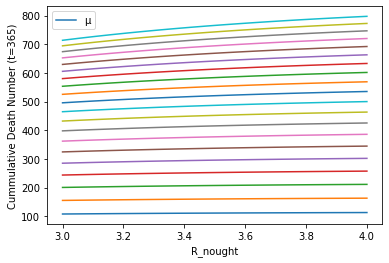

In [72]:
plt.plot(df.index, df)
plt.xlabel("R_nought")
plt.ylabel("Cummulative Death Number (t=365)")
plt.legend('μ', ncol=2, loc='upper left')
plt.show()

# With regard to the prediction of death number at year end, also known as the cumulative number of deaths, R_nought has little impact as shown in the following graph. However, the death number is highly determined by the death rate μ. 

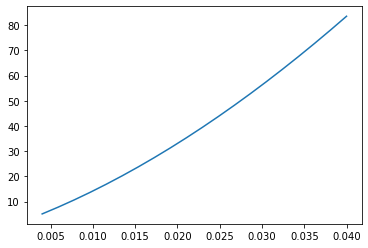

In [76]:
stat = df.astype(float).describe()
spread = stat.loc['max'] - stat.loc['min']
plt.plot(stat.columns, spread)

# There is one interesting finding about the interaction of μ and R_nought: as μ increases, the effect of R_noght, silmulated by max death number associated with highest R_nought=4 minus min death number associated with low R_noght=3, is increasing as well. Therefore, μ magnifies the impact of R_nought. The higher the μ value, the larger impact R_nought can make to the death number.